In [1]:
%load_ext autoreload
%autoreload 2

## load the dataset

In [102]:
import pandas as pd

# custom reader needed to handle quotechars
def read_df_custom(file):
    header = 'doc     unit1_toks      unit2_toks      unit1_txt       unit2_txt       s1_toks s2_toks unit1_sent      unit2_sent      dir     nuc_children    sat_children    genre   u1_discontinuous        u2_discontinuous       u1_issent        u2_issent       u1_length       u2_length       length_ratio    u1_speaker      u2_speaker      same_speaker    u1_func u1_pos  u1_depdir       u2_func u2_pos  u2_depdir       doclen  u1_position      u2_position     percent_distance        distance        lex_overlap_words       lex_overlap_length      unit1_case      unit2_case      label'
    extracted_columns = ['unit1_txt', 'unit1_sent', 'unit2_txt', 'unit2_sent', 'dir', 'label', 'distance', 'u1_depdir', 'u2_depdir', 'u2_func', 'u1_position', 'u2_position', 'sat_children', 'nuc_children', 'genre', 'unit1_case', 'unit2_case',
                            'u1_discontinuous', 'u2_discontinuous', 'same_speaker', 'lex_overlap_length', 'u1_func']
    header = header.split()
    df = pd.DataFrame(columns=extracted_columns)
    file = open(file, 'r')

    rows = []
    count = 0 
    for line in file:
        line = line[:-1].split('\t')
        count+=1
        if count ==1: continue
        row = {}
        for column in extracted_columns:
            index = header.index(column)
            row[column] = line[index]
        rows.append(row)

    df = pd.concat([df, pd.DataFrame.from_records(rows)])
    return df

train_df = read_df_custom('../../processed/deu.rst.pcc_train_enriched.rels')
test_df = read_df_custom('../../processed/deu.rst.pcc_test_enriched.rels')
val_df = read_df_custom('../../processed/deu.rst.pcc_dev_enriched.rels')

Text(0, 0.5, 'Counts')

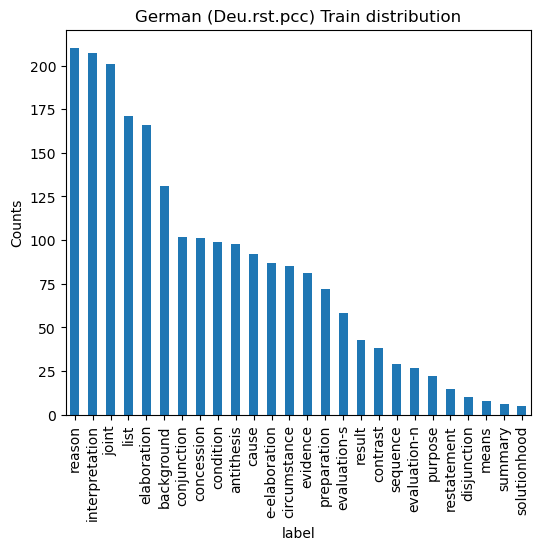

In [103]:
import matplotlib as plt

count_df = pd.DataFrame(train_df.groupby('label').count()['dir'])
count_df.columns = ['count']
total = count_df.sum()[0]
count_df['percentage'] = count_df['count'].astype(float)*100.0/total
count_df.sort_values(by='percentage', ascending=False, inplace=True)

ax = count_df['count'].plot.bar(title='German (Deu.rst.pcc) Train distribution', figsize=(6, 5))
ax.set_ylabel('Counts')